# Applied Machine Learning Systems ELEC0134 (19/20) Assignment

Please set this variable to FALSE if you wanted to retrain the model  

In [23]:
USE_PREBUILT_MODEL_IF_AVAIL = True

Some general constants that will be used in the code:

In [24]:
import csv
import os
import pandas as pd

from collections import Counter
from PIL import Image


CSV_LABEL_SEPARATOR_MARK = '\t'

# TASK A
TASK_A_DATASET_DIR = 'Datasets/celeba/img/'
TASK_A_LABEL_CSV_FILEPATH = 'Datasets/celeba/labels.csv'
TASK_A_X_HEADER_NAME = 'img_name'
TASK_A1_Y_HEADER_NAME = 'gender'
TASK_A2_Y_HEADER_NAME = 'smiling'


# TASK B
TASK_B_DATASET_DIR = 'Datasets/cartoon_set/img/'
TASK_B_LABEL_CSV_FILEPATH = 'Datasets/cartoon_set/labels.csv'
TASK_B_X_HEADER_NAME = 'file_name'
TASK_B1_Y_HEADER_NAME = 'face_shape'
TASK_B2_Y_HEADER_NAME = 'eye_color'

## 1. Exploratory Data Analysis

Firstly, let's take a look at characteristics of our dataset. We'll look at the proportion of each label in our dataset, the pixel dimension of image datasets, and to see if whether we should do some additional preprocessing.

### 1.1. Proportion of Label

#### 1.1.1. Task A1: Gender Detection using Celeba Dataset

-1    2500
 1    2500
Name: gender, dtype: int64
[[<matplotlib.axes._subplots.AxesSubplot object at 0x11667d198>]]


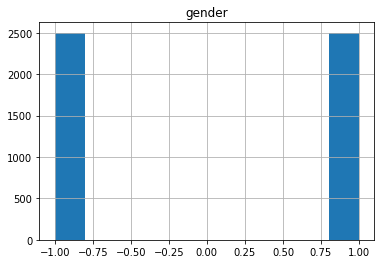

In [25]:
task_a_label_df = pd.read_csv(
                    TASK_A_LABEL_CSV_FILEPATH,
                    sep=CSV_LABEL_SEPARATOR_MARK
                )
print(task_a_label_df[TASK_A1_Y_HEADER_NAME].value_counts())
print(task_a_label_df.hist(column=TASK_A1_Y_HEADER_NAME))

***
#### 1.1.2. Task A2: Emotion Detection (smiling or not) using Celeba Dataset

-1    2500
 1    2500
Name: smiling, dtype: int64
[[<matplotlib.axes._subplots.AxesSubplot object at 0x107512278>]]


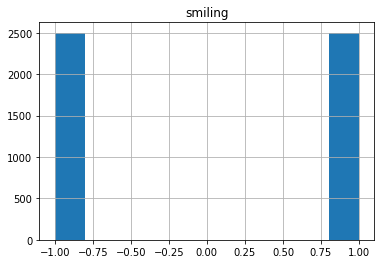

In [26]:
print(task_a_label_df[TASK_A2_Y_HEADER_NAME].value_counts())
print(task_a_label_df.hist(column=TASK_A2_Y_HEADER_NAME))

***
#### 1.1.3. Task B1: Face Shape Recognition using Cartoonset Dataset

4    2000
3    2000
2    2000
1    2000
0    2000
Name: face_shape, dtype: int64
[[<matplotlib.axes._subplots.AxesSubplot object at 0x113a09a20>]]


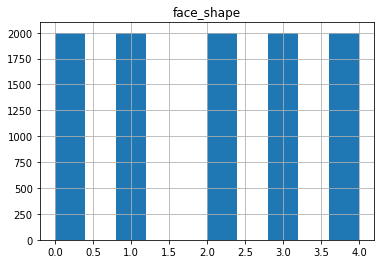

In [27]:
task_b_label_df = pd.read_csv(
                    TASK_B_LABEL_CSV_FILEPATH,
                    sep=CSV_LABEL_SEPARATOR_MARK
                )
print(task_b_label_df[TASK_B1_Y_HEADER_NAME].value_counts())
print(task_b_label_df.hist(column=TASK_B1_Y_HEADER_NAME))

***
#### 1.1.4. Task B2: Eye Colour Recognition using Cartoonset Dataset

1    2018
4    2017
0    2004
3    1992
2    1969
Name: eye_color, dtype: int64
[[<matplotlib.axes._subplots.AxesSubplot object at 0x117169da0>]]


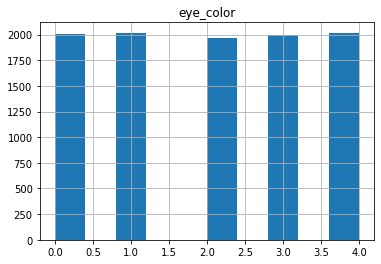

In [28]:
print(task_b_label_df[TASK_B2_Y_HEADER_NAME].value_counts())
print(task_b_label_df.hist(column=TASK_B2_Y_HEADER_NAME))

***
Now, let's look at the dimension of each image in our two datasets, to see if whether we should do preprocessing to make the image size uniform.

### 1.2. Pixel Dimension of Image Dataset

#### 1.2.1. Task A Dataset

In [29]:
def check_pixel_size_in_dataset(dataset_foldername, filename_list):
    pixel_size_list = []
    for filename in filename_list:
        filepath = os.path.join(dataset_foldername, filename)
        width, height = Image.open(filepath).size
        pixel_size_list.append(str(width) + ", " + str(height))
    pixel_size_df = pd.DataFrame(pixel_size_list, columns=['img_dimension'])
    return pixel_size_df['img_dimension'].value_counts(), pixel_size_df['img_dimension'].hist()

(178, 218    5000
 Name: img_dimension, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x117791b70>)

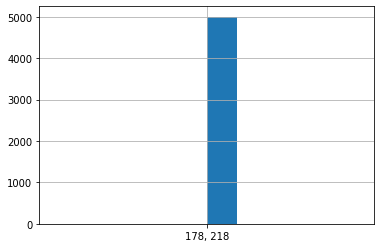

In [30]:
task_a_img_filename_list = task_a_label_df[TASK_A_X_HEADER_NAME]
check_pixel_size_in_dataset(TASK_A_DATASET_DIR, task_a_img_filename_list)

#### 1.2.2. Task B Dataset

(500, 500    10000
 Name: img_dimension, dtype: int64,
 <matplotlib.axes._subplots.AxesSubplot at 0x11764d4a8>)

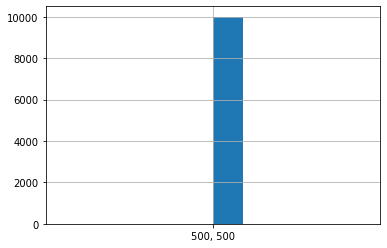

In [31]:
task_b_img_filename_list = task_b_label_df[TASK_B_X_HEADER_NAME]
check_pixel_size_in_dataset(TASK_B_DATASET_DIR, task_b_img_filename_list)

***
### 1.3. Conclusion from Exploratory Data Analysis
From the exploratory data analysis, we learn that the ratio/proportion of each label in dataset is already good, so we don't need to preprocess the dataset to even out the ratio.

***

## 2. TASK A1: Gender Detection (Male/Female)

In this binary classification task, we are going to use the `celeba` dataset to detect gender from the face image dataset.

### 2.1. Load the Dataset

In [32]:
def determine_X_and_Y_set_from_label_file(label_csv_filepath, x_header_name, y_header_name, delimiter=CSV_LABEL_SEPARATOR_MARK):
    """Determine the X (the input features) and the Y (label) from a CSV file
    """
    X = []
    Y = []
    with open(label_csv_filepath) as csv_file:
        data = csv.DictReader(csv_file, delimiter=delimiter)
        for row in data:
            X.append(row[x_header_name])
            Y.append(row[y_header_name])
    return X, Y

In [33]:
X, Y = determine_X_and_Y_set_from_label_file(
    TASK_A_LABEL_CSV_FILEPATH,
    TASK_A_X_HEADER_NAME,
    TASK_A1_Y_HEADER_NAME)